# Simple orders analysis

🚀 We are finally ready to start analysing our `orders` dataset!

Our objective is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [17]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=True)

/Users/fercancercel/code/fercanc/data-context-and-setup/olist/order.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
/Users/fercancercel/code/fercanc/data-context-and-setup/olist/order.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
/Users/fercancercel/code/fercanc/data-context-and-setup/olist/order.py:33: SettingWi

In [20]:
orders

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,review_score,dim_is_five_star,dim_is_one_star,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,4,0,0,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,4,0,0,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,5,1,0,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,5,1,0,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,5,1,0,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered,5,1,0,1,1,72.00,13.08,69.481037
95876,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,4,0,0,1,1,174.90,20.10,474.098245
95877,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,5,1,0,1,1,205.99,65.02,968.051192
95878,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,2,0,0,2,1,359.98,81.18,370.146853


In [21]:
# Check your shape below

# Shape if you set with_distance_seller_customer=True
if orders.shape[1] == 13: 
    assert(orders.shape == (95872, 13))

# Shape if you set with_distance_seller_customer=False    
else:  
    assert(orders.shape == (96353, 12))

## 1 - Inspect features

👉 Print summary statistics of each column of the order dataset (then focus in particular on `wait_time`)

In [22]:
# YOUR CODE HERE

orders.describe()
orders.dtypes

order_id                     object
wait_time                   float64
expected_wait_time          float64
delay_vs_expected           float64
order_status                 object
review_score                  int64
dim_is_five_star              int64
dim_is_one_star               int64
number_of_products            int64
number_of_sellers             int64
price                       float64
freight_value               float64
distance_seller_customer    float64
dtype: object

📈 Plot histograms to get a sense of the distribution of each numerical feature.

<AxesSubplot:xlabel='review_score', ylabel='Count'>

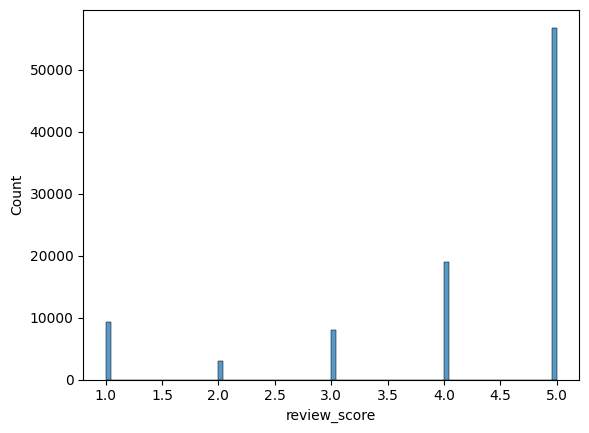

In [23]:
# YOUR CODE HERE

# orders = sns.load_dataset("orders")
sns.histplot(data=orders, x="review_score")

# sns.histplot(data = orders, x = 'review_score' y = = 'wait_time',  height=2)
# # plt.show()


👀 In particular, create a `sns.FacetGrid()` of histograms for each `review_score` vs. `wait_time`

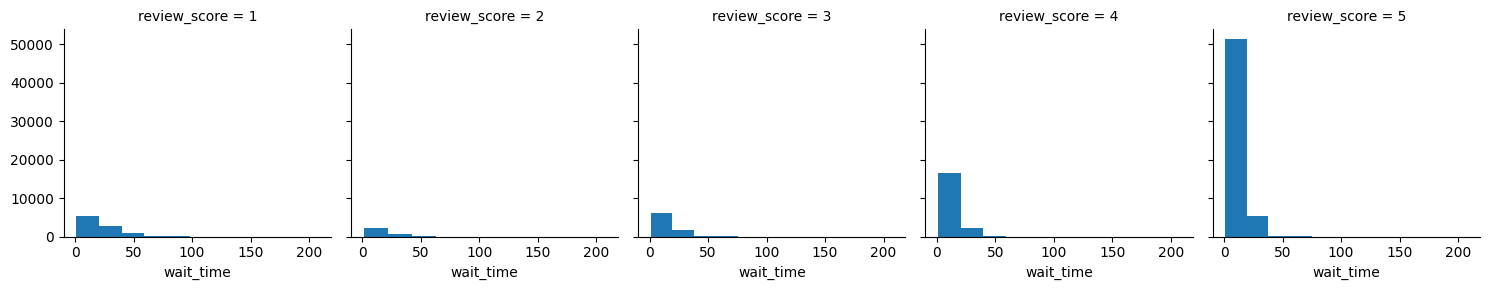

In [24]:
# YOUR CODE HERE

g = sns.FacetGrid(data = orders, col = "review_score")
g.map(plt.hist,  "wait_time")

# sns.set(style='white')
# sns.pairplot(orders, height=2)
# plt.show()

❓ What do you notice for the variables `price` and `freight_value` ? 

❓ Have a look at the  `distance_seller_customer` feature if you have created it in `order.py`

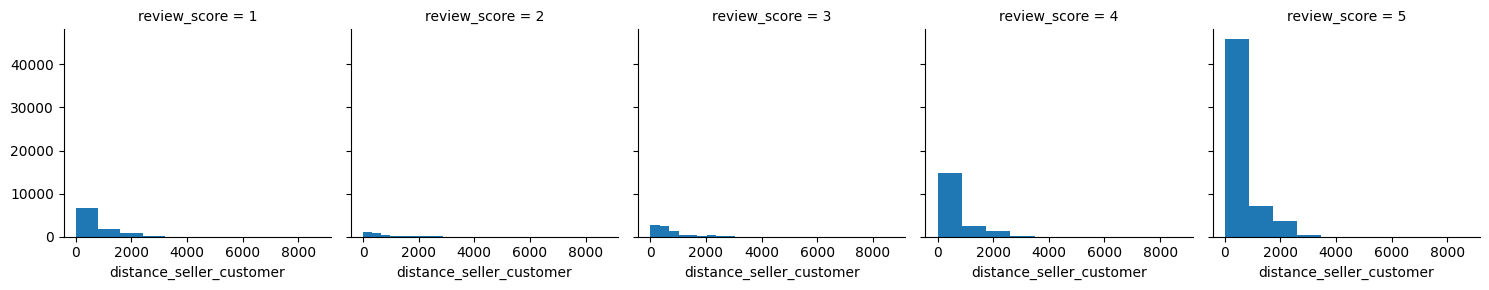

In [25]:
# YOUR CODE HERE
g = sns.FacetGrid(data = orders, col = "review_score")
g.map(plt.hist,  "distance_seller_customer")

❓Inspect the various correlations between features: which feature seems to the most correlated with `review_score`?

<details>
    <summary>▸ Hint</summary>

* Use `DataFrame.corr()` combined with `sns.heatmap()` and `cmap='coolwarm'`
* Have a look at the absolute values of the correlation coefficients of `review_score` vs. each feature,
    * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

</details>

In [26]:
# YOUR CODE HERE
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = orders.corr()
corr.style.background_gradient(cmap='coolwarm')
# corr.style.background_gradient(cmap='coolwarm').set_precision()

,wait_time,expected_wait_time,delay_vs_expected,review_score,dim_is_five_star,dim_is_one_star,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
wait_time,1.000000,0.385628,0.702597,-0.334036,-0.234101,0.305577,-0.019754,-0.040702,0.055638,0.167284,0.394984
expected_wait_time,0.385628,1.000000,0.005519,-0.052525,-0.050333,0.034842,0.015735,0.024884,0.076606,0.238748,0.513583
delay_vs_expected,0.702597,0.005519,1.000000,-0.272361,-0.156735,0.284706,-0.013653,-0.017162,0.016632,0.023887,0.066066
review_score,-0.334036,-0.052525,-0.272361,1.000000,0.791749,-0.807758,-0.123340,-0.117017,-0.034538,-0.090014,-0.059147
dim_is_five_star,-0.234101,-0.050333,-0.156735,0.791749,1.000000,-0.396354,-0.072270,-0.070536,-0.012762,-0.058773,-0.056559
dim_is_one_star,0.305577,0.034842,0.284706,-0.807758,-0.396354,1.000000,0.119848,0.102241,0.044660,0.082778,0.043180
number_of_products,-0.019754,0.015735,-0.013653,-0.123340,-0.072270,0.119848,1.000000,0.288734,0.153551,0.438056,-0.017306
number_of_sellers,-0.040702,0.024884,-0.017162,-0.117017,-0.070536,0.102241,0.288734,1.000000,0.042986,0.133580,-0.007644
price,0.055638,0.076606,0.016632,-0.034538,-0.012762,0.044660,0.153551,0.042986,1.000000,0.410129,0.079348
freight_value,0.167284,0.238748,0.023887,-0.090014,-0.058773,0.082778,0.438056,0.133580,0.410129,1.000000,0.314188


* 😏 _Captain Obvious :_
    * `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : 27 %

## 2 - Simple regression of `review_score` against delivery duration

👉 So, it seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (27%).

🎨 Let's investigate these correlations  with `seaborn`

### 2.1 Plots
❓ In one figure, create 2 subplots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Tips</u>:

- Reduce your dataframe to a random sub-`sample of 10,000 rows` for speed purposes (a good practice in data exploration)
- Use `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution if needed
- Use `sns.regplot()` to plot the `regression lines`
- Add some `y_jitter` parameters to better visualize the scatterplot density
- Limit `xlim` and `ylim` to hide outliers

(0.0, 5.414067603884581)

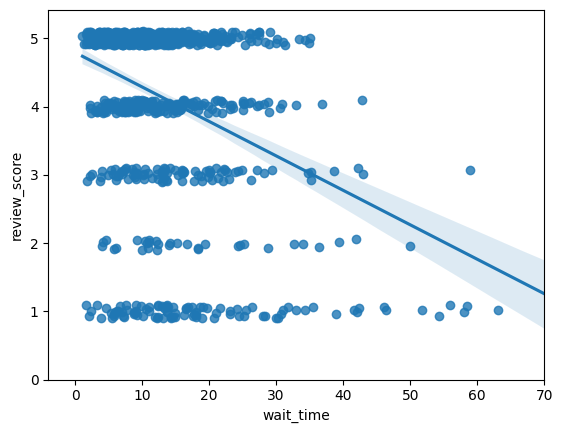

In [27]:
# YOUR CODE HERE
sns.regplot(data=orders.sample(1000,random_state=1), x='wait_time', y='review_score', y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

(0.0, 5.617398944982458)

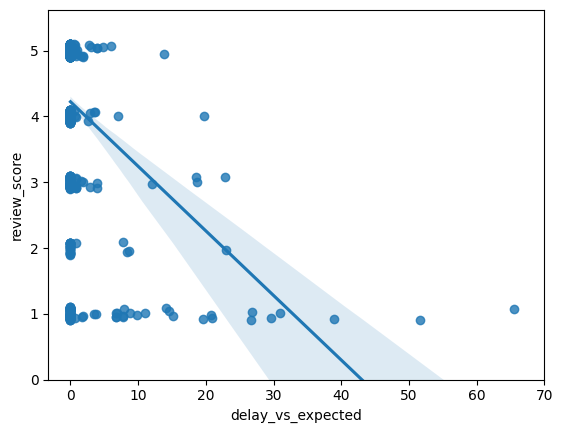

In [28]:
# YOUR CODE HERE
sns.regplot(data=orders.sample(1000,random_state=1), x='delay_vs_expected', y='review_score', y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

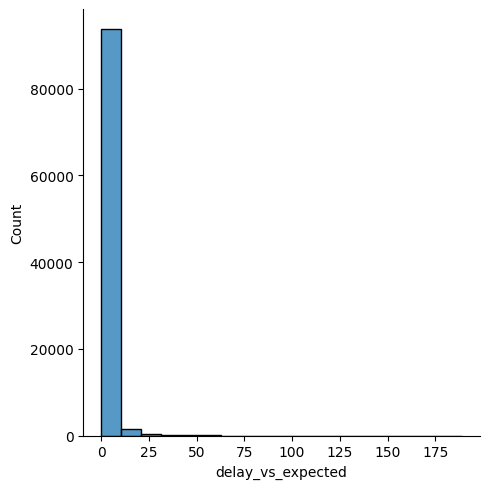

In [29]:
sns.displot(orders['delay_vs_expected'])


ℹ️ What did `regplot` do ? 

👉 It tried to perform a `Linear Regression` of the `review_score` vs. `wait_time` and `delay_vs_exp` <br/> *(Cf. Day 03 - Linear Regression tomorrow)*

🧐 It doesn't look so interpretable, does it ?

👉 You are right: we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score - Well, not surprising. But how fast does the review score decrease ?


### 2.2 Interpretation

❓Try to visually "compute" the `slope` of each curve. 

✍️ Write down, in plain English, how you would interpret these coefficients if you were to explain it to a non-data-educated audience.

> YOUR ANSWER HERE

review score is negatively correlated with wait time
review score is negatively correlated with delay after expected time 

<details>
    <summary>▸ Answer</summary>


- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

❓ Are you surprised that the delay seems more impactful than the waiting time ? 
    
👉If yes, think about it twice: you may be impatient to receive your order and would like a small wait time, but you would be even more disappointed to receive your package after the expected delivery date !
        
</details>

### 2.3 Inferential analysis

Even if we had used all 100,000 orders for these regplots, these orders represent 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ <u> Questions about the statistical significance of these coefficients: </u>

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 We need to estimate the **`confidence interval`** around the mean value for these two slopes  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

⭐️ Fortunately, `Seaborn` already computes this 95% confidence interval for us with a shaded blue cone around the regression line!

❓Use `Seaborn` `regplot` to visualize the two confidence intervals:
- Change the `size of your sample dataset`: 
    - Notice how the slope may change as the sample size becomes smaller. 
    - What about the confidence interval?
- Change the `size of the confidence interval` by playing with the regplot parameter called `ci` (95% by default)

<AxesSubplot:xlabel='wait_time', ylabel='review_score'>

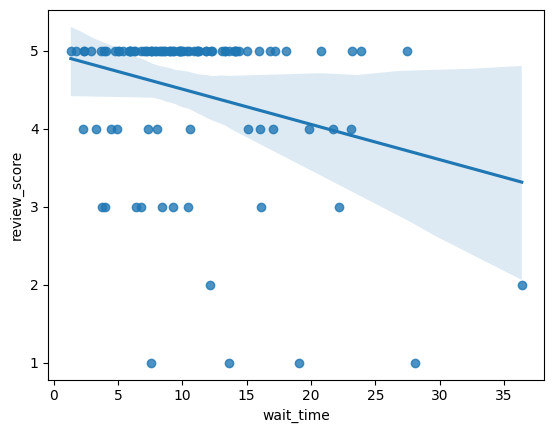

In [30]:
# YOUR CODE HERE
sns.regplot(data=orders.sample(100,random_state=1), x='wait_time', y='review_score', ci=99)


<AxesSubplot:xlabel='delay_vs_expected', ylabel='review_score'>

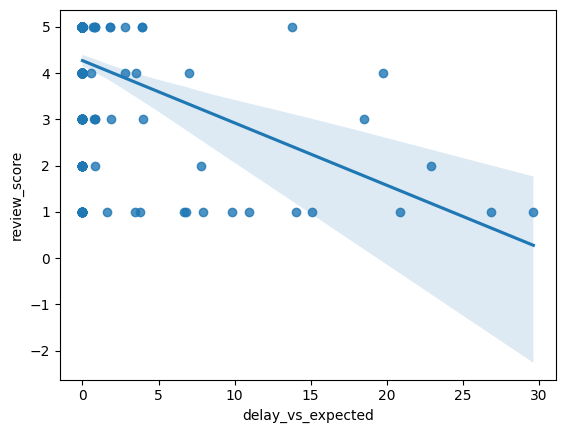

In [31]:
sns.regplot(data=orders.sample(500,random_state=1), x='delay_vs_expected', y='review_score', ci=99)

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the impact of delivery time on review scores is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 

🗓 Cf. `Lecture 3 - Linear Regression` : we will talk about **`multivariate linear regression`**. 
</details>



---
🏁 Congratulations! 

🙏 Don't forget to `commit` and `push` your notebook